#BIRUNGI JOAN

# Visualizing Clusters with Principal Component Analysis

In this exercise you will cluster credit card customer data using 8 features and visualize those clusters in a two-dimensional scatter plot.

In order to accomplish this, you will:
1. Import libraries
2. Load data
3. Drop unneeded columns
4. Explore the data and clean as needed
5. Scale the Data
6. Tune a KMeans model and cluster the scaled data using all of the features.
7. Transform the scaled data using PCA
8. Create a scatter plot of the first 2 principal components of the PCA data, colored by the labels from the KMeans model.
9. Bonus: Create a 3D scatter plot using Plotly Express scatter_3d() function using the first 3 principal components of the PCA data as the x, y, and z axes and the labels from the KMeans model as the color.

[Documentation for scatter_3d from Plotly Express](https://plotly.com/python-api-reference/generated/plotly.express.scatter_3d)

# 1. Import Necessary Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split

# 2. Load Data

In [ ]:
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQfsaRE3Pq4HcnCgIb5hgszzYNcKQBoypmZm2zW9Q9hU9-tWdtP8qxBBsiUWMFKzG66unPOdi-lfKdM/pub?gid=794640114&single=true&output=csv')

df.head()

,Unnamed: 0,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [ ]:
df.shape

(700, 8)

# 3. Drop Unnecessary Columns

In [ ]:
# if 'Unnamed:' in df.columns:
    #df.drop(columns=['Unnamed:'], inplace=True)

In [ ]:
# Drop unnecessary columns
df.drop(['Unnamed: 0', 'Customer Id'], axis=1, inplace=True)


In [ ]:
df.isna().sum()

,0
Age,0
Edu,0
Years Employed,0
Income,0
Card Debt,0
Other Debt,0
Defaulted,150
DebtIncomeRatio,0


In [ ]:
df.shape

(850, 8)

In [ ]:
df.isna().sum()

,0
Age,0
Edu,0
Years Employed,0
Income,0
Card Debt,0
Other Debt,0
Defaulted,150
DebtIncomeRatio,0


# 4. EDA and Cleaning

In [ ]:
# Remove rows with NaN values
df.dropna(inplace=True)
df
df.isna().sum().sum()

np.int64(0)

In [ ]:
df.shape

(700, 8)

1. **STATISTICS**

In [ ]:
#statistics
df.describe()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,34.860000,1.722857,8.388571,45.601429,1.553566,3.058196,0.261429,10.260571
std,7.997342,0.928206,6.658039,36.814226,2.117196,3.287550,0.439727,6.827234
min,20.000000,1.000000,0.000000,14.000000,0.012000,0.046000,0.000000,0.400000
25%,29.000000,1.000000,3.000000,24.000000,0.368750,1.044000,0.000000,5.000000
50%,34.000000,1.000000,7.000000,34.000000,0.855000,1.987500,0.000000,8.600000
75%,40.000000,2.000000,12.000000,55.000000,1.901750,3.923250,1.000000,14.125000
max,56.000000,5.000000,31.000000,446.000000,20.561000,27.034000,1.000000,41.300000


2. **RELATIONSHIPS AND CORRELATION**

    **Positive (+)** → both variables move in the same direction.

    **Negative (-)** → variables move in opposite directions.

    **Zero (0)** → no linear relationship (but there may still be a nonlinear relationship).

Text(0.5, 1.0, 'Correlation Matrix')

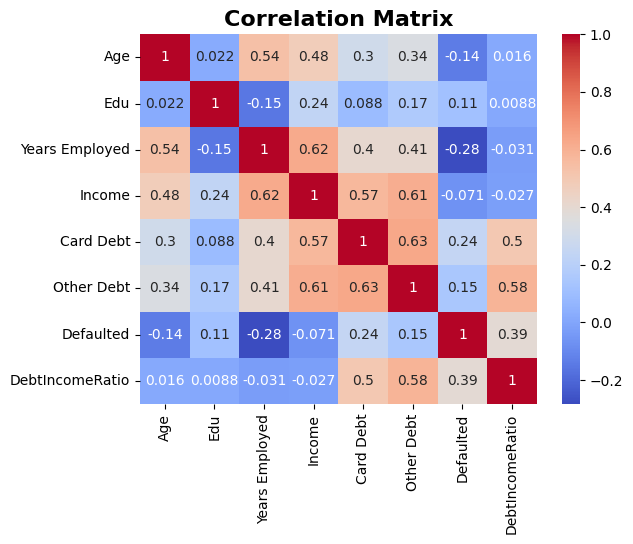

In [ ]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix", fontsize=16, fontweight='bold')

3. **SCATTER PLOT**

Text(0.5, 1.0, 'Scatter Plot')

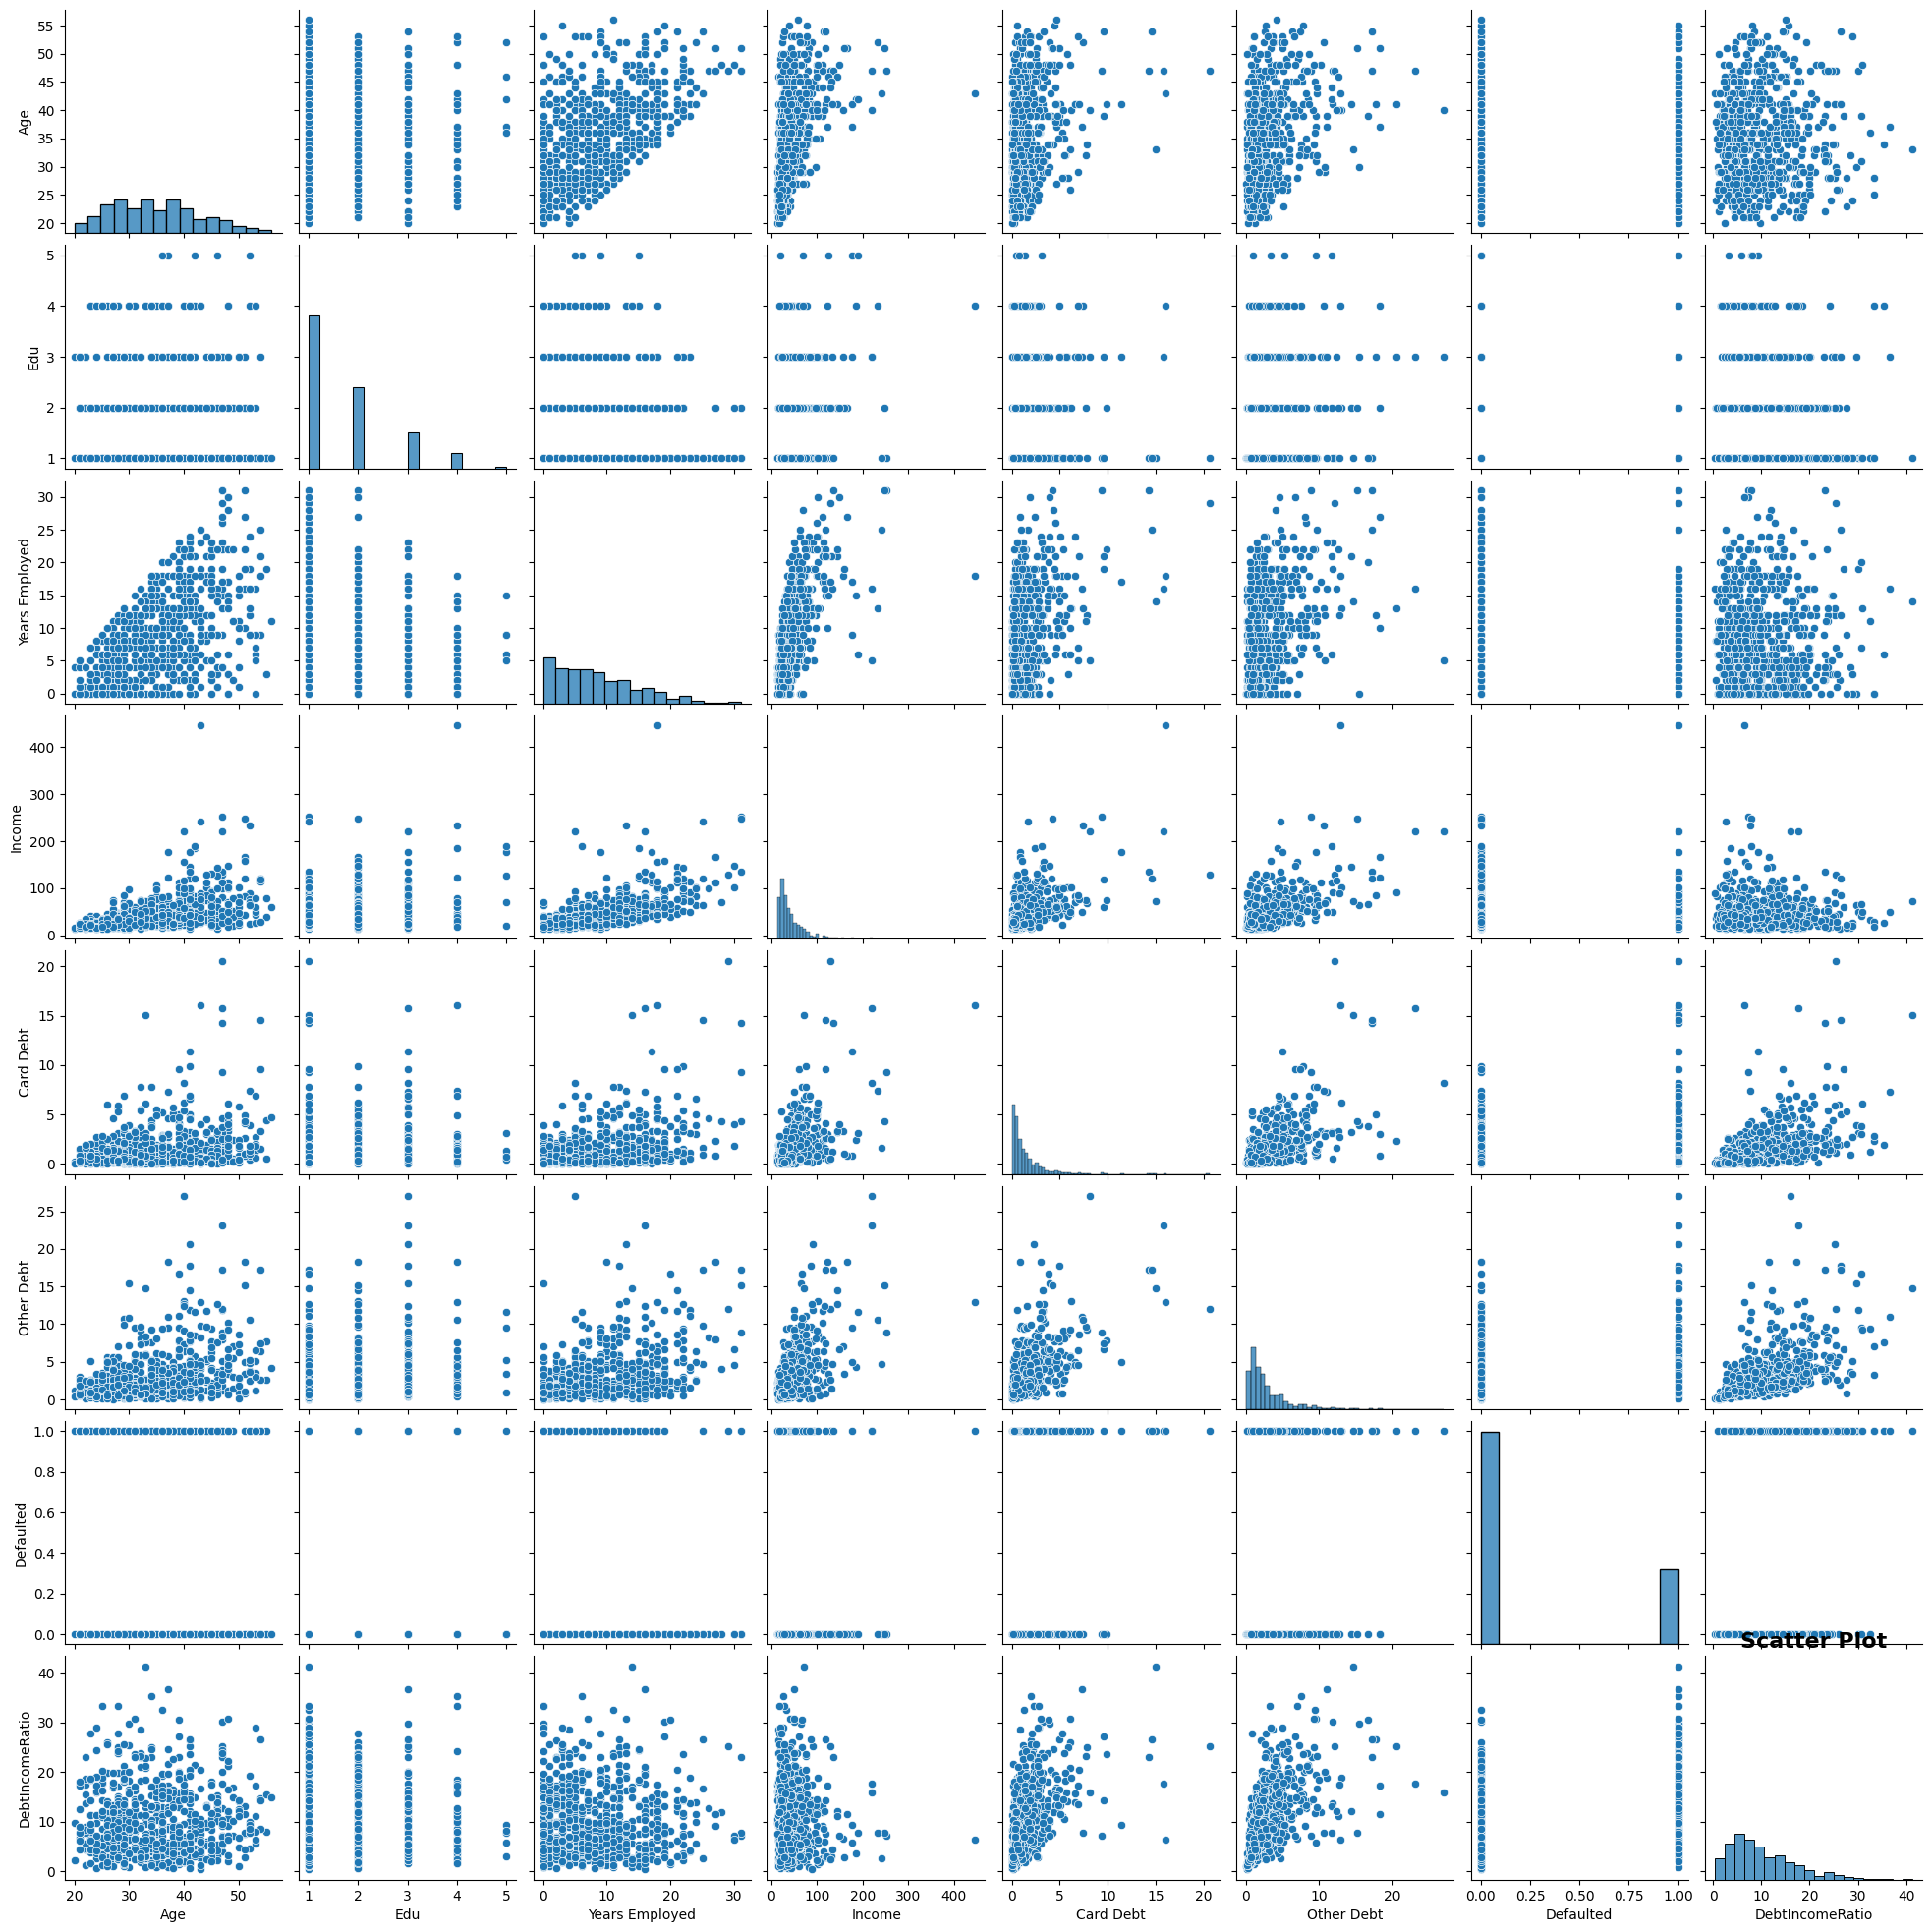

In [ ]:
sns.pairplot(df.select_dtypes(include='number'))
plt.title("Scatter Plot", fontsize=16, fontweight='bold')

# 5. Scale Data

In [ ]:
#Scale the Data
scaler = StandardScaler()

# Fit & transform data.
scaled_data = scaler.fit_transform(df)

# Save for reuse
df_scaled = pd.DataFrame(scaled_data, columns=df.columns)

df_scaled
scaled_data


array([[ 0.76830405,  0.29879269, -0.35900652, ..., -0.60428433,
        -0.59494973, -0.58052847],
       [ 1.51908977, -0.77932527,  2.64702891, ...,  1.5706204 ,
        -0.59494973,  0.37222169],
       [-0.23274357,  0.29879269,  0.24220057, ...,  0.83520125,
         1.68081427,  1.55949495],
       ...,
       [-1.2337912 ,  2.45502862, -1.26081715, ...,  0.04620852,
         1.68081427,  3.39170678],
       [-0.35787453, -0.77932527,  0.54280411, ..., -0.71904138,
        -0.59494973, -1.07889008],
       [ 2.14474454, -0.77932527,  1.1440112 , ...,  0.17648972,
        -0.59494973, -0.24340149]])

# 6. Tune a KMeans Model and Cluster the Scaled Data Using All Features

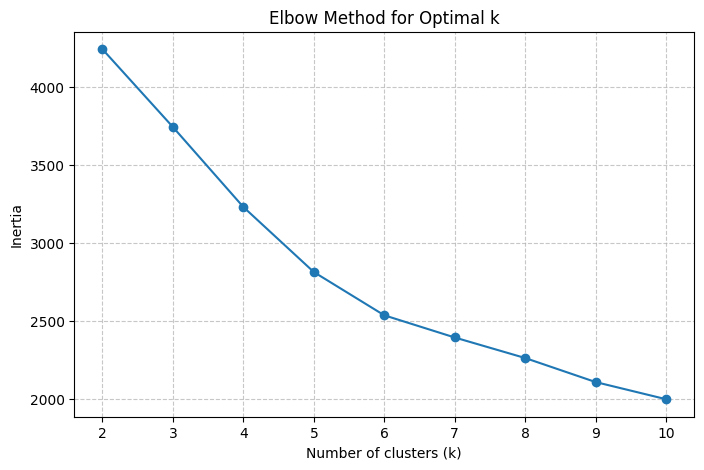

In [ ]:
#  Elbow method to find optimal k
inertia_values = []
K_range = range(2, 11)  # Check between 2 and 10 clusters

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(scaled_data)
    inertia_values.append(km.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K_range, inertia_values, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Add vertical grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add vertical grid lines
plt.show()


optimal_k = 4
#Elbow method loop calculates KMeans inertia for different k values.

 **the Graph.**

* optimal_k = 5
* n_clusters=5

**Appropriate Choice**

Using the elbow method and balancing gain vs loss:

For exploratory analysis → 4 components (83% variance, simpler model).



In [ ]:
# (For simplicity here, let's use 4 clusters )
kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(scaled_data)

# 7. Transform the Scaled Data with PCA

In [ ]:
# Instantiate & fit data using PCA
pca = PCA(n_components=4)  # 3 components so we can do 2D & 3D
pca_data = pca.fit_transform(scaled_data)


Plot for Appropriate Choice of components using PCA

Text(0.5, 1.0, 'PCA WITH SCALED DATA')

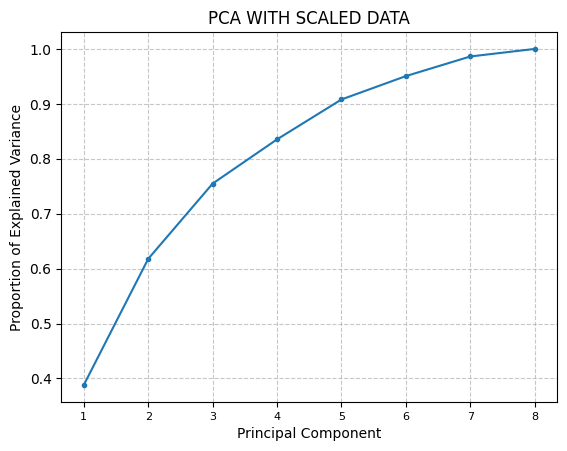

In [ ]:
pca = PCA()
pca.fit(scaled_data)
# plot the cumulative sum of the percentage of explained variance for each component and those before it.
plt.plot(range(1, 9), pca.explained_variance_ratio_.cumsum(), marker= '.')
plt.xticks(ticks=range(1,9), fontsize=8);
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Explained Variance')
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add vertical grid lines
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Add vertical grid lines
plt.title('PCA WITH SCALED DATA')

**Understanding the plot**


* X-axis = Principal Component number (PC1, PC2, … PC8)

* Y-axis = Cumulative proportion of variance explained (from 0 to 1)
* The curve starts at ~0.40 for PC1 and reaches 1.0 (100% variance explained) at PC8.

* The curve is concave down — meaning each new component explains less additional variance than the previous one.

**Information Gain per Component**

1. Component added (PC1)	— Cumulative Variance(~0.38) —	Incremental Gain(+0.38)

2. Component added (PC2) — Cumulative Variance(~0.62) — Incremental Gain(+0.24)

3. Component added (PC3) — Cumulative Variance(~0.75) — Incremental Gain(+0.13)

4. Component added (PC4) — Cumulative Variance(~0.83) — Incremental Gain(+0.08)

5. Component added (PC5) — Cumulative Variance(~0.91) — Incremental Gain(+0.08)

6. Component added (PC6) — Cumulative Variance(~0.95) — Incremental Gain(+0.04)

7. Component added (PC7) — Cumulative Variance(~0.99) — Incremental Gain(+0.04)

8. Component added (PC8) — Cumulative Variance(1.00) — Incremental Gain(+0.01)

**Interpretation:**

The first 3–4 components give large gains (>0.08 each).

After PC5, the gain per component is tiny (<0.05), meaning diminishing returns.

**Information Loss**

Information loss = 1 – cumulative variance explained.


* Component (PC3) — Cumulative Variance(~0.75) — information loss(25%)

* Component (PC4) — Cumulative Variance(~0.83) — information loss(17%)
* Component (PC5) — Cumulative Variance(~0.91) — information loss(9%)
*   Component (PC6) — Cumulative Variance(~0.95) — information loss(5%)

choosing 4 components, loss is ~17% of the information;
choosing 5 components, loss only ~9% of the information.

**Appropriate Choice of components**

Using the elbow method and balancing gain vs loss:

* PC1–PC4 → Good balance, ~83% variance retained, large early gains.

* very low loss (<10%), then  PC1–PC5 (~91% variance) is better.

* Beyond PC5, the information gain is minimal and might not justify complexity.


**in conclusion:**

For exploratory analysis → 4 components (83% variance, simpler model).

For minimal loss in predictive modeling → 5 components (91% variance).









# 8. Plot the Clusters

- The x axis should be the first principal component, you can extract this from the PCA array with `pca_data[:, 0]`

- The y axis should be the second principal component, you can extract this from the PCA array with `pca_data[:, 1]`

- The `c` argument should be the labels from the kmeans model.

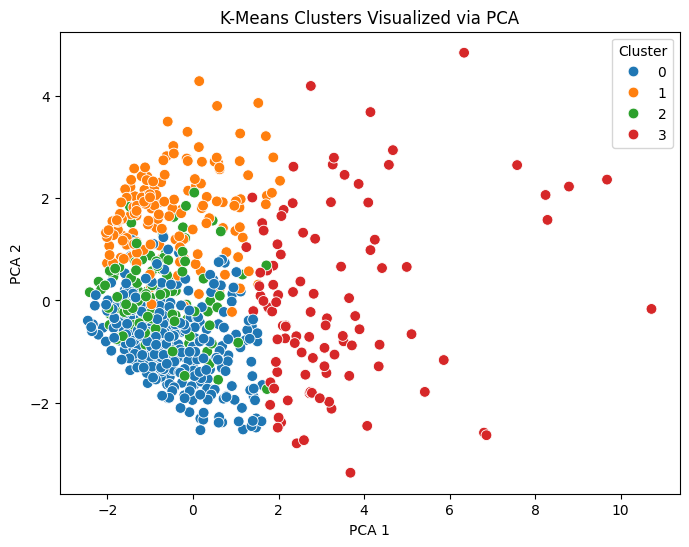

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create a DataFrame for easier plotting with seaborn
df_plot = pd.DataFrame({'PCA1': pca_data[:, 0],'PCA2': pca_data[:, 1],'C': labels})

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_plot, x='PCA1', y='PCA2',hue='C', palette='tab10', s=60)
plt.title('K-Means Clusters Visualized via PCA')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Cluster', loc='best')
plt.show()


# 9. BONUS Plot 3 components with Plotly Express

x, y, and z should be the first 3 components and color should be the KMeans model clusters.

[scatter_3d documentation](https://plotly.com/python-api-reference/generated/plotly.express.scatter_3d)

In [ ]:
#  Bonus: 3D scatter with Plotly
fig = px.scatter_3d(
    x=pca_data[:, 0],
    y=pca_data[:, 1],
    z=pca_data[:, 2],
    color=labels.astype(str),  # Convert to string so colors are discrete
    #title="3D PCA Visualization of Clusters"
    title=f"3D PCA Visualization of KMeans Clusters (k={optimal_k})"
)
fig.show()